In [1]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.manifold import TSNE
from scipy.stats import rv_discrete
import random 
import math
import sys
import time
from IPython import display

dim = 10
params = [(np.random.rand(1,dim) * 20, np.random.random() * 2) for _ in range(4)]
n = 10000
X = np.ndarray((0,dim))
for mu, sigma in params:
    X = np.append(X, sigma * np.random.randn(n, dim) + mu, axis=0)

if dim > 2:
    # reduce the dimensionality of the data set so we can plot it
    model = TSNE(n_components=2, perplexity=80)
    reduced = model.fit_transform(X)
else:
    reduced = X

plt.scatter(reduced[:,0], reduced[:,1])

KeyboardInterrupt: 

In [3]:
def centroidsF(points, closest, k):
    avg = []
    count = [0 for x in range(k)]
    for i in range(k):
        avg.append(([0]*len(points[0])))
    
    for i in range(len(points)): #for each point
        for j in range(len(points[0])): #for each dimension
            avg[closest[i]][j] += points[i][j]
        count[closest[i]] += 1
    
    for i in range(k):
        for j in range(len(points[0])):
            if count[i] > 0:
                avg[i][j] /= count[i]
    return avg
    
def kMeans(k, points, plotting):
    print("Starting kmeans")
    assert k < len(points)
    random.seed()
    centers = []
    while (len(centers) < k):
        p = points[random.randint(0, len(points) - 1)]
        if (p not in centers): #ensure we dont get duplicates
            centers.append(p)
    

    #print "Initial centers: ", centers
    oldCenters = []
    iteration = 0
    while centers != oldCenters and iteration < 100:
        iteration = iteration + 1
        print ("Iteration ", iteration)
        
        minDist = [sys.maxsize for x in range(len(points))]
        closest= [sys.maxsize for x in range(len(points))]
        
        oldCenters = centers
        
        for i in range(len(centers)):
            for j in range(len(points)):
                dist = distance (centers[i], points[j])
                if minDist[j] > dist:
                    minDist[j] = dist
                    closest[j] = i
        #print("starting cent2")
        centers = centroidsF(points, closest, k)
        #print("done cent2")
        if (plotting):
            if len(points[0]) > 2:
                model = TSNE(n_components=2, perplexity=80, random_state=0)
                reduced = model.fit_transform(np.append(X,centers,axis=0))
            else:
                reduced = np.append(X, centers, axis=0)

            colors = "bgrcmy"
            cs = [colors[i % len(colors)] for i in closest]
            cs += ['k'] * k
            plt.clf()
            plt.scatter(reduced[:,0], reduced[:,1], color = cs)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(1)
            
    if len(points[0]) > 2:
        model = TSNE(n_components=2, perplexity=80, random_state=0)
        reduced = model.fit_transform(np.append(X,centers,axis=0))
    else:
        reduced = np.append(X, centers, axis=0)

        colors = "bgrcmy"
        cs = [colors[i % len(colors)] for i in closest]
        cs += ['k'] * k
        plt.clf()
        plt.scatter(reduced[:,0], reduced[:,1], color = cs)
        display.clear_output(wait=True)
        display.display(plt.gcf())

    return centers, closest
        
#computes the distance squared between 2 n dimensional tuples
def distance(a, b):
    assert len(a) == len(b)
    d = 0
    for i in range(len(a)):
        d += (a[i]-b[i])*(a[i]-b[i])
    return d

centroids, cluster_assignment = kMeans(4, X.tolist(), False)

AttributeError: 'list' object has no attribute 'tolist'

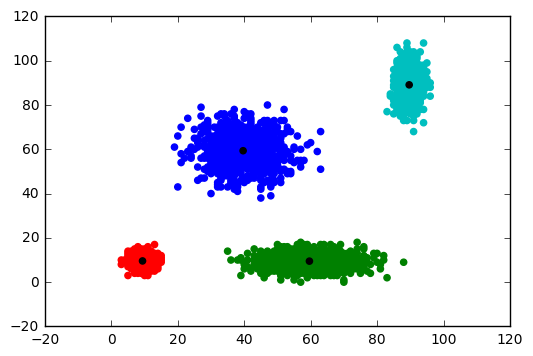

8.495193004608154


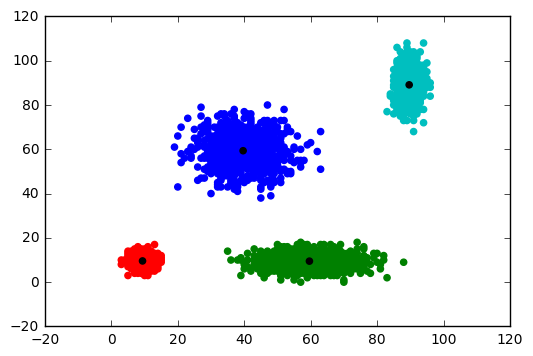

In [5]:
def get_kmeans_data(file_name):
    vectors= []
    with open(file_name, 'r') as file_handler:
        for line in file_handler:
            vector = [float(v.strip()) for v in line.strip().split(',')]
            vectors.append(vector)
        #print(vectors)
    return vectors
start=time.time()
X = np.ndarray((0,dim))
X = get_kmeans_data("in.txt")
#X = np.append(X, v, axis=0);
kMeans(4, X, True)
print(time.time()-start)

In [22]:

with open('in.txt', 'w') as f:
    for x in X:
        print(','.join([str(xi) for xi in x]), file=f)
    print(','.join([str(xi) for xi in x]))

9.0,9.0


In [9]:
len(X)

0